In [126]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [127]:
sigle = pd.read_csv('/Users/xieqingyao/Desktop/regression/test.csv')
multiple = pd.read_csv('/Users/xieqingyao/Desktop/regression/insurance.csv')

### object > number

In [128]:
multiple['sex'].replace({'female':0,'male':1},inplace=True)
multiple['smoker'].replace({'no':0,'yes':1},inplace=True)

In [129]:
region = pd.get_dummies(multiple['region'])

In [130]:
multiple = pd.concat([region,multiple],axis=1)

In [131]:
multiple = multiple.drop(['region','northeast'],axis=1)

### split

In [132]:
X1 = sigle.iloc[:,:-1].values
y1 = sigle.iloc[:,-1].values

In [133]:
X2 = multiple.iloc[:,:-1].values
y2 = multiple.iloc[:,-1].values

In [134]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1,y1,test_size = 0.2,random_state=0)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,test_size = 0.2,random_state=0)

## 1 feature

In [135]:
reg = LinearRegression()
reg.fit(X1_train,y1_train)

LinearRegression()

In [136]:
y1_pred = reg.predict(X1_test)

畫圖

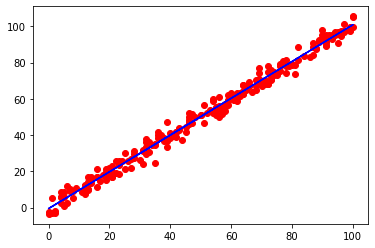

In [137]:
plt.scatter(X1_train,y1_train,color='red')
plt.plot(X1_train,reg.predict(X1_train),color='blue')
plt.show()

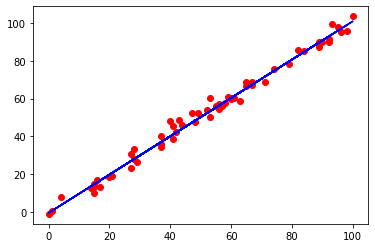

In [138]:
plt.scatter(X1_test,y1_test,color='red')
plt.plot(X1_test,reg.predict(X1_test),color='blue')
plt.show()

In [139]:
print(reg.coef_)
print(reg.intercept_)

[1.0144497]
-0.5333242119059278


結果 >>>  y = 1.0144497x -0.5333242119059278

## n features

In [140]:
reg = LinearRegression()
reg.fit(X2_train,y2_train)

LinearRegression()

In [141]:
print(reg.coef_)
print(reg.intercept_)

[-2.60132732e+02 -9.13278834e+02 -7.61948706e+02  2.53700500e+02
 -1.54637279e+01  3.35962814e+02  4.36910121e+02  2.36050173e+04]
-11828.073537474766


結果 >>> y =  -26*northwest - 91.3*southeast - 76.2*southwest + 25.4*age - 15.5*sex + 33.6*bmi + 43.7*children + 23.6*smoker - 11828.073537474766

In [142]:
# import statsmodels.api as sm
# X_opt = np.array(X2_train[:,[0,1,2,3,4,5,6,7]],dtype=float)
# reg_ols = sm.OLS(endog = y2_train,exog = X_opt).fit()
# reg_ols.summary()

In [143]:
def back(x,sl):
    col = []
    numvars = len(x[0])
    remain = [i for i in range(0,numvars)]
    for i in range(0,numvars):
        reg_ols = sm.OLS(y2_train,x).fit()
        maxvar = max(reg_ols.pvalues).astype(float)    #目前最高的 p-value
        if maxvar > sl:
            for j in range(0,numvars - i):
                if reg_ols.pvalues[j].astype(float) == maxvar:
                    x = np.delete(x,j,1)
                    remain.pop(j)
    for i in remain:
        col.append(multiple.columns[i])
    
    return reg_ols.summary(),remain,col
    

In [144]:
SL = 0.05
X_opt = np.array(X2_train[:,0:len(X2_train[0])],dtype=float)

In [145]:
back(X_opt,SL)

(<class 'statsmodels.iolib.summary.Summary'>
 """
                                  OLS Regression Results                                
 Dep. Variable:                      y   R-squared (uncentered):                   0.868
 Model:                            OLS   Adj. R-squared (uncentered):              0.868
 Method:                 Least Squares   F-statistic:                              1170.
 Date:                Wed, 01 Dec 2021   Prob (F-statistic):                        0.00
 Time:                        21:44:59   Log-Likelihood:                         -10907.
 No. Observations:                1070   AIC:                                  2.183e+04
 Df Residuals:                    1064   BIC:                                  2.186e+04
 Df Model:                           6                                                  
 Covariance Type:            nonrobust                                                  
                  coef    std err          t      P>|t|     